In [52]:
import numpy as np
from uncertainties import ufloat
from uncertainties import unumpy as unp
import matplotlib.pyplot as plt

In [53]:
t_pulse = 500*1e-9

X4_T1 = ufloat(37.75,0.93)*1e-6
X3_T1 = ufloat(10.09,0.15)*1e-6
Z1_T1 = ufloat(16.22,0.39)*1e-6
X1_T1 = ufloat(35.04,0.69)*1e-6
Z3_T1 = ufloat(11.86,0.17)*1e-6
Z4_T1 = ufloat(12.9,0.47)*1e-6
Z2_T1 = ufloat(6.8,0.22)*1e-6

qubits = np.array(['X4', 'X3', 'Z1', 'X1', 'Z3', 'Z4', 'Z2'])
arg_sort = np.argsort(qubits)
qubits = qubits[arg_sort]
print(qubits)
T1_array = np.array([X4_T1, X3_T1, Z1_T1, X1_T1, Z3_T1, Z4_T1, Z2_T1])[arg_sort]

['X1' 'X3' 'X4' 'Z1' 'Z2' 'Z3' 'Z4']


In [59]:
average_assign_fid = 1/2 + 1/2*unp.exp(-t_pulse/(2*T1_array))
qnd_pi_fid = 1/2 + 1/2*unp.exp(-t_pulse/T1_array)

average_assign_fid_nom = unp.nominal_values(average_assign_fid)
average_assign_fid_std = unp.std_devs(average_assign_fid)

qnd_pi_fid_nom = unp.nominal_values(qnd_pi_fid)
qnd_pi_fid_std = unp.std_devs(qnd_pi_fid)

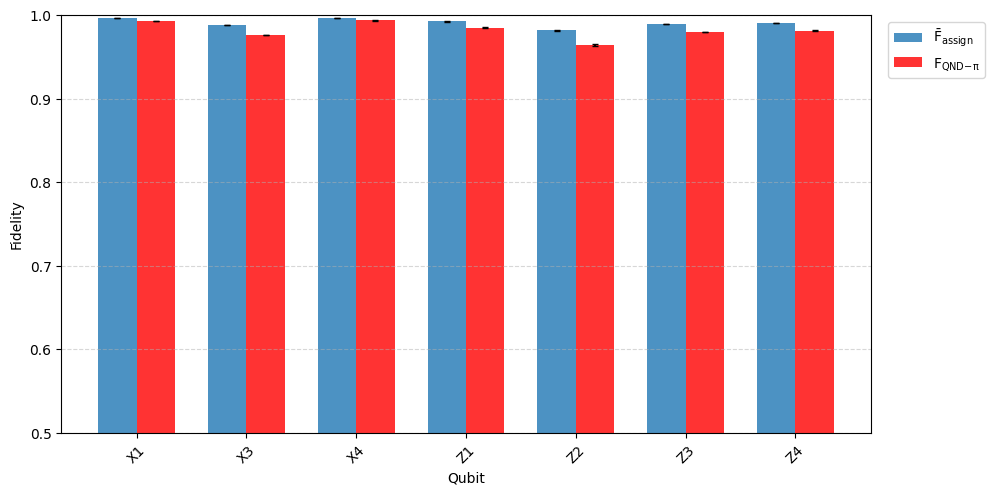

In [66]:
x = np.arange(len(qubits))       # the label locations
width = 0.35                     # the width of the bars

plt.figure(figsize=(10, 5))

# Bar 1: average assignment fidelity (shift left)
plt.bar(x - width/2, average_assign_fid_nom, width, 
        yerr=average_assign_fid_std, label=r'$\mathrm{\bar{F}_{assign}}$', 
        capsize=2, alpha=0.8)

# Bar 2: QND π fidelity (shift right)
plt.bar(x + width/2, qnd_pi_fid_nom, width, 
        yerr=qnd_pi_fid_std, label=r'$\mathrm{F_{QND\!-\!\pi}}$', 
        color='red', capsize=2, alpha=0.8)

# Labeling
plt.xticks(x, qubits, rotation=45)
plt.ylabel('Fidelity')
plt.xlabel('Qubit')
plt.legend(loc='upper right', bbox_to_anchor = (1.15,1.0))
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.ylim(0.5,1.0)
plt.show()